<a href="https://colab.research.google.com/github/kwanqing/CMPE-257/blob/class_activity/PLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv("synthetic_dataset.csv")
df.head()

,x1,x2,y
0,-4.641770,5.558556,1
1,7.139793,6.571105,1
2,4.127969,-9.024912,-1
3,0.081377,3.861381,1
4,-1.253937,8.009625,1


<Axes: xlabel='x1', ylabel='x2'>

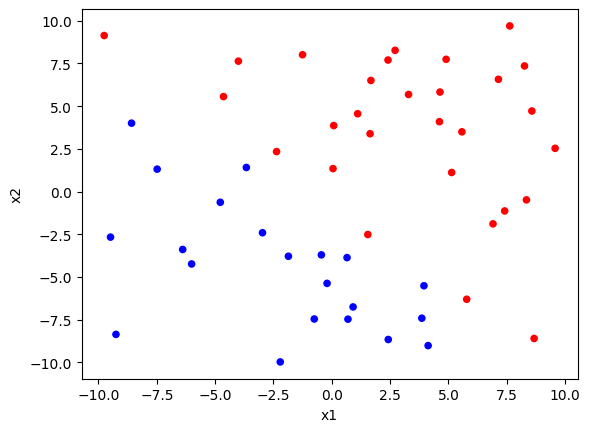

In [321]:
c = df['y'].map({-1:'b', 1: 'r'})
df.plot.scatter(x='x1', y='x2', c=c)

In [285]:
df.insert(0, "x0", 1)
df.head()

,x0,x1,x2,y
0,1,-4.641770,5.558556,1
1,1,7.139793,6.571105,1
2,1,4.127969,-9.024912,-1
3,1,0.081377,3.861381,1
4,1,-1.253937,8.009625,1


In [314]:
def get_sign(w, x):
  return np.sign(np.dot(w, x))

In [315]:
def find_misclassified(x, y, weight):
  for i in range(len(x)):
        # Calculate the dot product between the feature vector and the weight vector
        dot_product = np.dot(x[i], weight)

        # Check if the point is misclassified
        if np.sign(dot_product) != y[i]:
            return x[i], y[i]

  # If no misclassified point is found, return None
  return None, None

In [316]:
def PLA(df):
    w = np.zeros(3)
    df_x = df.iloc[:, [0, 1, 2]].values  # Converting DataFrame to numpy array for efficiency
    df_y = df.iloc[:, 3].values

    while True:
        x_mis, y_mis = find_misclassified(df_x, df_y, w)  # Notice the function name is corrected here
        if y_mis is None:  # Checking for None instead of 0, as find_misclassified returns None when no misclassified point is found
            break
        w += x_mis * y_mis  # Update weights

        # Debugging information
        print("x_mis:", x_mis, "y_mis:", y_mis)
        new_y = get_sign(w, x_mis)
        print("new_y:", new_y)

    return w

In [317]:
w = PLA(df)
w

x_mis: [ 1.         -4.64177026  5.55855572] y_mis: 1
new_y: 1.0
x_mis: [1.         5.1364167  1.11332641] y_mis: 1
new_y: 1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: -1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: 1.0
x_mis: [ 1.         -4.64177026  5.55855572] y_mis: 1
new_y: 1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: -1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: 1.0
x_mis: [ 1.         -3.66249313  1.40660126] y_mis: -1
new_y: -1.0
x_mis: [ 1.         -4.64177026  5.55855572] y_mis: 1
new_y: 1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: 1.0
x_mis: [ 1.         -8.58312177  4.00217147] y_mis: -1
new_y: -1.0
x_mis: [ 1.         -4.64177026  5.55855572] y_mis: 1
new_y: 1.0
x_mis: [ 1.         -9.75561638  9.13456539] y_mis: 1
new_y: 1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: -1.0
x_mis: [ 1.          1.54355617 -2.51962581] y_mis: 1
new_y: -1.0
x_mis: [ 1.         

array([16.        ,  8.62450545,  9.51985476])

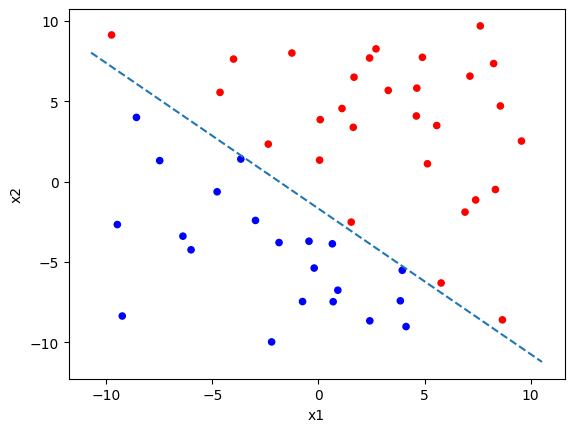

In [318]:
c = df['y'].map({-1:'b', 1: 'r'})
df.plot.scatter(x='x1', y='x2', c=c)
axes = plt.gca()
x_val = np.array(axes.get_xlim())
y_val = -w[0]/w[2] - w[1]/w[2] * x_val
plt.plot(x_val, y_val, '--')